In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import missingno as mn
from matplotlib import pyplot as plt
from feature_engine import imputation as imp
from feature_engine import encoding as enc
from feature_engine import transformation as trans

In [2]:
data_set = pd.read_csv('../../../../../../Machine Learning/case data/hose-price-prediction/train.csv',index_col='Id')
data_set

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
num_features = data_set.select_dtypes(include=np.number)
cat_features = data_set.select_dtypes(include=np.object)
num_features.columns, num_features.columns

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrB

In [4]:
num_features.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [5]:
cat_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [6]:
num_features.sample(5).T

Id,505,234,171,117,1163
MSSubClass,160.0,20.0,50.0,20.0,20.0
LotFrontage,24.0,75.0,NaN,NaN,109.0
LotArea,2308.0,10650.0,12358.0,11616.0,8724.0
OverallQual,6.0,5.0,5.0,5.0,5.0
OverallCond,5.0,6.0,6.0,5.0,5.0
YearBuilt,1974.0,1976.0,1941.0,1962.0,1968.0
YearRemodAdd,1974.0,1976.0,1950.0,1962.0,1968.0
MasVnrArea,0.0,0.0,0.0,116.0,0.0
BsmtFinSF1,257.0,182.0,360.0,170.0,492.0
BsmtFinSF2,495.0,712.0,0.0,670.0,0.0


In [7]:
cat_features.sample(5).T

Id,893,1289,466,1250,933
MSZoning,RL,RL,RM,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,Reg,Reg,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,Inside,Inside,Inside,Corner
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,Sawyer,StoneBr,Blmngtn,NAmes,Somerst
Condition1,Norm,Norm,Norm,Norm,RRNn


GarageYrBlt should be a integer type column

In [8]:
num_features.isna().mean().sort_values(ascending=False)

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
OpenPorchSF      0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
MSSubClass       0.000000
BedroomAbvGr     0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
EnclosedPorch    0.000000
FullBath         0.000000
HalfBath         0.000000
BsmtFinSF2       0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BsmtFinSF1       0.000000
BsmtUnfSF        0.000000
BsmtHalfBath     0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
SalePrice        0.000000
dtype: float64

In [9]:
cat_features.isna().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
GarageType       0.055479
GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
MasVnrType       0.005479
Electrical       0.000685
Functional       0.000000
KitchenQual      0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
PavedDrive       0.000000
SaleType         0.000000
MSZoning         0.000000
Street           0.000000
Condition2       0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st 

<Figure size 3600x1800 with 0 Axes>

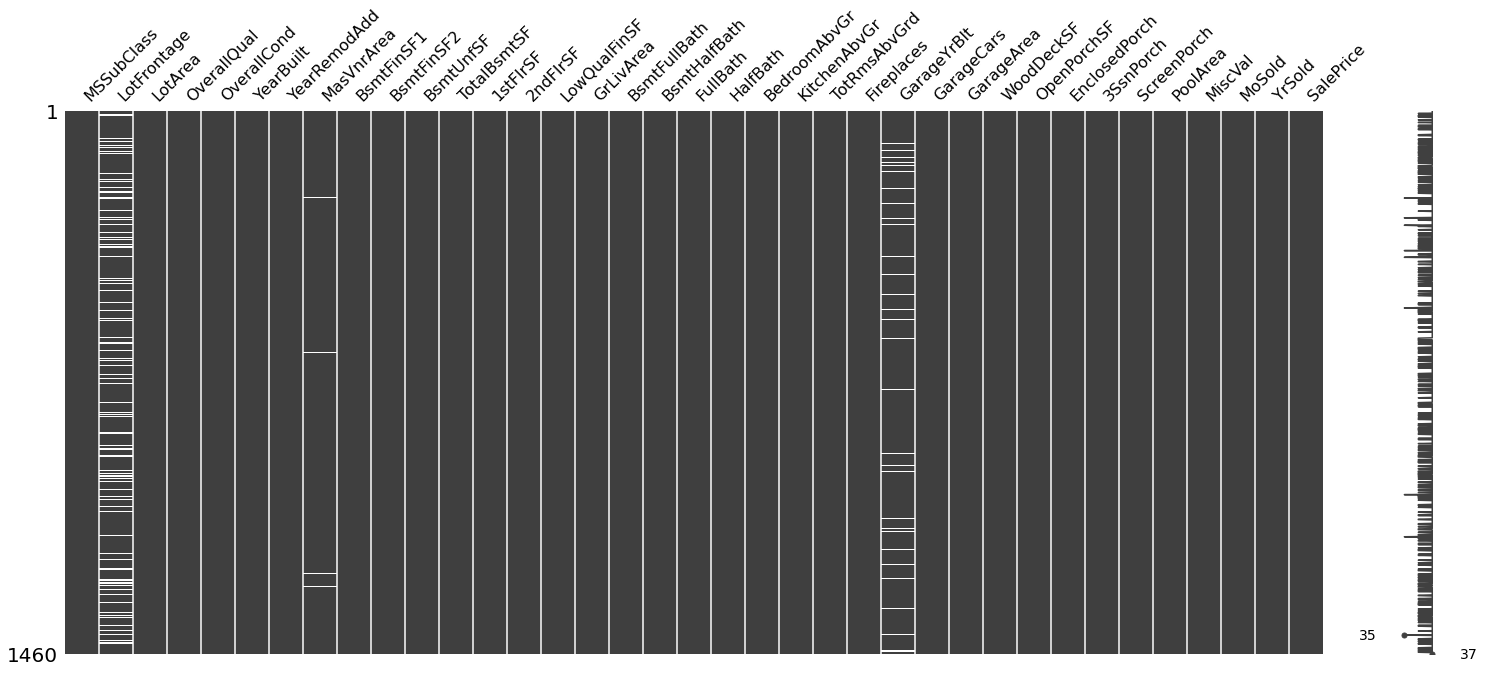

In [10]:
plt.figure(figsize=[12,6],dpi=300)
mn.matrix(num_features)
plt.show()

<Figure size 3600x1800 with 0 Axes>

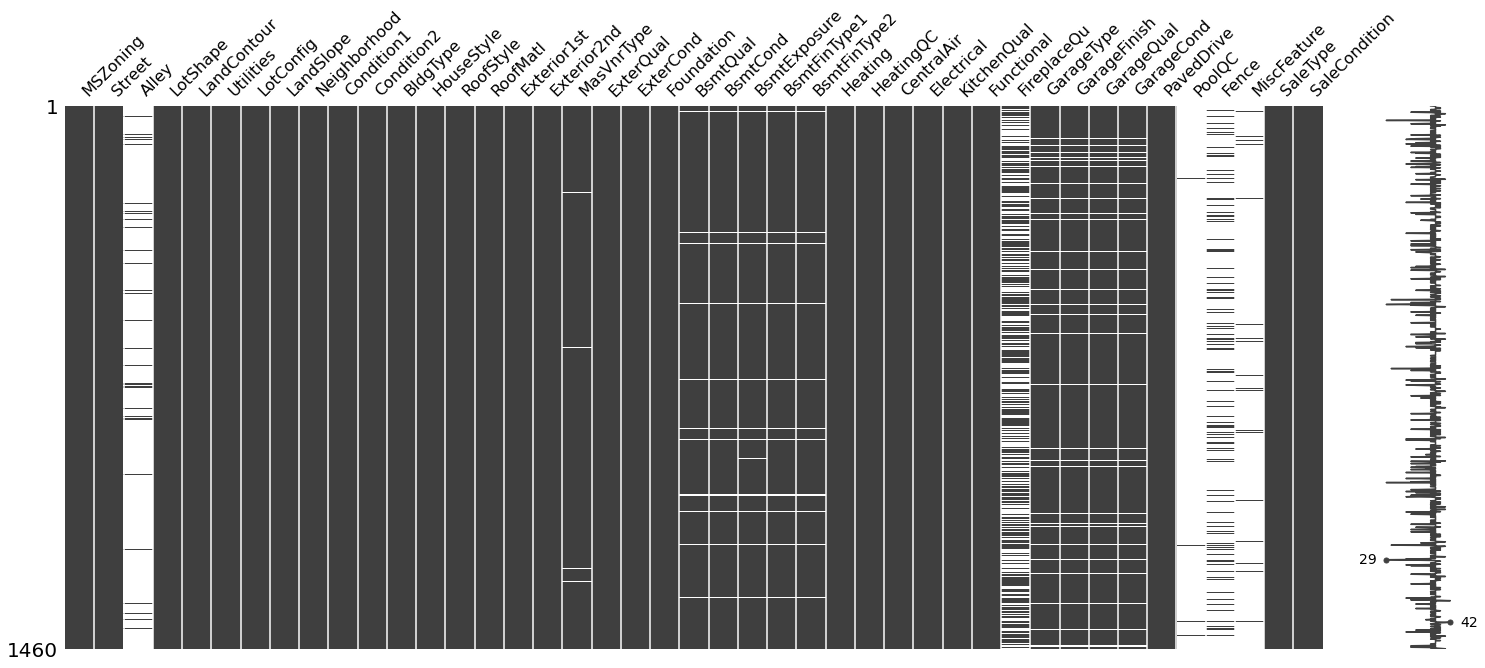

In [11]:
plt.figure(figsize=[12,6],dpi=300)
mn.matrix(cat_features)
plt.show()

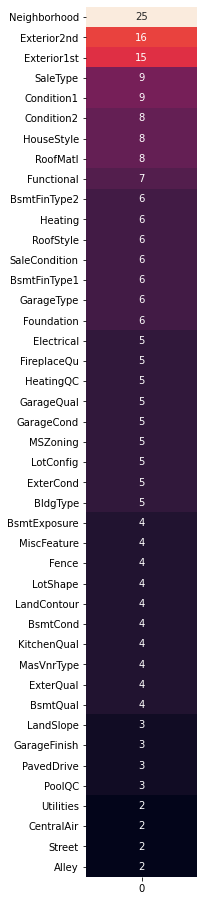

In [12]:
plt.figure(figsize=[2,16])
sns.heatmap(pd.DataFrame(cat_features.nunique().sort_values(ascending=False)),annot=True,fmt='g',cbar=False)
plt.show()

In [24]:
fig,axes = plt.subplots(nrows=22,ncols=2,figsize=[24,132],dpi=300)
axes = axes.ravel()

for i in range(cat_features.shape[1]):
    graph = sns.countplot(x=cat_features[cat_features.columns[i]],ax=axes[i],palette='viridis')
    axes[i].axhline(cat_features.shape[0]*0.01,color='#D90B1C')
    axes[i].axhline(cat_features.shape[0]*0.05,color='#506AD4')
    graph.set_xticklabels(graph.get_xticklabels(), rotation=30)

plt.show()